## Relax_Challenge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from collections import Counter
%matplotlib inline

#### Exploring Users table

In [2]:
users_df = pd.read_csv('C:/relax_challenge/takehome_users.csv', encoding='latin-1')
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
# creation_time to date time type
users_df['creation_time'] = pd.to_datetime(users_df['creation_time'])
users_df['last_session_creation_time'] = pd.to_datetime(users_df['last_session_creation_time'])
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(3)
memory usage: 937.6+ KB


##### Exploring Engagement table

In [5]:
ue_df = pd.read_csv('C:\\relax_challenge\\takehome_user_engagement.csv')
ue_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
ue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
# time_stamp to date time

ue_df['time_stamp'] = pd.to_datetime(ue_df['time_stamp'])
ue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
## filtering users who have logged less than 3 times through out from the engagement table
import pandasql as pdsql
from pandasql import sqldf
pysql = lambda q: pdsql.sqldf(q, globals())
str1= """SELECT *
From ue_df where user_id not in (
SELECT  user_id
from ue_df
group by user_id
having count(visited) < 3)
"""
filtered_users_df = pysql(str1)
# df1.set_index('loan_status',inplace = True)
filtered_users_df.tail()
filtered_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201002 entries, 0 to 201001
Data columns (total 3 columns):
time_stamp    201002 non-null object
user_id       201002 non-null int64
visited       201002 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


#### Defining an "adopted user" as a user who has logged into the product on three separate days on a 7 days week.


In [9]:
# How many values does 'visited' take?
sorted(list(ue_df['visited'].unique()))

seven_days = datetime.timedelta(7)
adopted_dict = {}
for user_id in sorted(list(ue_df ['user_id'].unique())):
    adopted_user = 0
    temp = ue_df[ue_df['user_id'] == user_id]
    temp = temp.sort_values('time_stamp')
    for row in temp.itertuples():
        if adopted_user == 1:
            continue
        this_time = temp.get_value(row[0], 'time_stamp')
        if len(temp[(temp['time_stamp'] >= this_time) & (temp['time_stamp'] <= (this_time + seven_days))]) >= 3:
            adopted_user = 1    
    adopted_dict[user_id] = adopted_user

In [10]:
users_df['adopted'] = 0
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0


In [11]:
for row in (users_df[np.logical_not(users_df['last_session_creation_time'].isnull())]).itertuples():
    adopted_value = adopted_dict[users_df.get_value(row[0], 'object_id')]
    users_df.set_value(row[0], 'adopted', adopted_value)

In [12]:
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.398138810,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1970-01-01 00:00:01.396237504,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1970-01-01 00:00:01.363734892,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.369210168,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1970-01-01 00:00:01.358849660,0,0,193,5240.0,0


In [13]:
users_df['adopted'].value_counts()

0    10344
1     1656
Name: adopted, dtype: int64

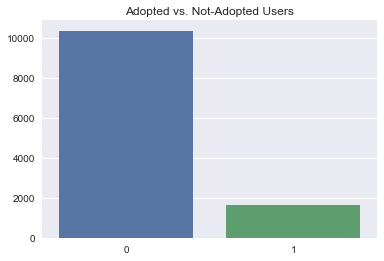

In [14]:
import seaborn as sns
sns.barplot(x = list(users_df['adopted'].value_counts().index), y = users_df['adopted'].value_counts())
plt.ylabel('')
plt.title('Adopted vs. Not-Adopted Users');

In [15]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted                       12000 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 1.0+ MB


Cleaning 

* Dropping name, email, date fields
* treat missing values
* Drop null rows
* Creating dummies for creation source

In [16]:
final_df = users_df.drop(['name', 'email', 'last_session_creation_time','creation_time','invited_by_user_id'], axis=1)

In [17]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
object_id                     12000 non-null int64
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
adopted                       12000 non-null int64
dtypes: int64(5), object(1)
memory usage: 562.6+ KB


In [18]:
final_df['creation_source'].value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

In [19]:
final_df_dum = pd.get_dummies(final_df, columns = ['creation_source'])
final_df_dum.head()

,object_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,0,1,0,0,0,0
1,2,0,0,1,1,0,1,0,0,0
2,3,0,0,94,0,0,1,0,0,0
3,4,0,0,1,0,1,0,0,0,0
4,5,0,0,193,0,1,0,0,0,0


In [20]:
final_df.dropna(axis=0, inplace=True)

#### Modeling

In [21]:
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

C:\Users\anands\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### train-test-split

In [22]:
# Split into train and test sets

train, test = train_test_split(final_df_dum, test_size=.30, 
                               random_state=42, stratify=final_df['adopted'])

train.reset_index(drop=True, inplace=True)
target = train['adopted']
train = train.drop('adopted', axis=1)

test.reset_index(drop=True, inplace=True)
test_target = test['adopted']
test = test.drop('adopted', axis=1)

print('Train shape: {}\n Test shape: {}'.format(train.shape, test.shape))

Train shape: (8400, 9)
 Test shape: (3600, 9)


#### Random forest ,cross validation

In [23]:
clf = RandomForestClassifier()

cv = cross_validation.KFold(len(train), n_folds=5)

cv_count = 1
for traincv, testcv in cv:  
        preds = clf.fit(train.loc[list(traincv),:], 
                        target.loc[list(traincv),]).predict(train.loc[list(testcv),:])
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(target.loc[testcv,], preds)

        print('Round {} CV\nAccuracy: {:.2f}\nAUC: {:.4f}\nConfusion Matrix:\n{}\n\n'\
                  .format(cv_count, accuracy_score(target.loc[testcv,], preds)*100, 
                          auc(false_positive_rate, true_positive_rate),
                          confusion_matrix(target.loc[testcv,], preds)))
        cv_count += 1

Round 1 CV
Accuracy: 82.32
AUC: 0.4973
Confusion Matrix:
[[1375   53]
 [ 244    8]]


Round 2 CV
Accuracy: 83.39
AUC: 0.5032
Confusion Matrix:
[[1390   60]
 [ 219   11]]


Round 3 CV
Accuracy: 84.11
AUC: 0.4913
Confusion Matrix:
[[1409   52]
 [ 215    4]]


Round 4 CV
Accuracy: 84.64
AUC: 0.5079
Confusion Matrix:
[[1412   41]
 [ 217   10]]


Round 5 CV
Accuracy: 84.64
AUC: 0.5089
Confusion Matrix:
[[1412   37]
 [ 221   10]]




In [24]:
final_clf = clf.fit(train, target)
test_preds = final_clf.predict(test)


print('Overall accuracy: {:.2f}\nConfusion Matrix:\n{}'\
          .format(accuracy_score(test_target, test_preds)*100, 
                  confusion_matrix(test_target, test_preds)))

Overall accuracy: 83.61
Confusion Matrix:
[[2981  122]
 [ 468   29]]


In [25]:
# Find feature importances
feature_importance = pd.DataFrame(final_clf.feature_importances_).T
feature_importance.columns = list(train.columns)
feature_importance = feature_importance.T
feature_importance.columns = ['feature_coef']
feature_importance.sort_values('feature_coef', ascending=False)

,feature_coef
object_id,0.536174
org_id,0.420683
enabled_for_marketing_drip,0.011944
opted_in_to_mailing_list,0.010734
creation_source_PERSONAL_PROJECTS,0.006753
creation_source_ORG_INVITE,0.003670
creation_source_GUEST_INVITE,0.003630
creation_source_SIGNUP_GOOGLE_AUTH,0.003323
creation_source_SIGNUP,0.003090


#### Conclusion

Although, we got a decent accuracy with Random Forest classifier, yet our model suffers from class imbalance heavily. And that is evident from the confusion matrix. This sets the future direction of this analysis. Oversampling/Undersampling/SMOTE techniques should be adopted and algorithms need re-run after that. Feature engineering can be incorporated to come up with a better feature with more power for example Creation Time and Last Creation Session Time could be engineered to find out the duration of usage. Features should be checked for any outliers as well.